# LightGBM Classifier - Fraud Detection

1. pip install category_encoders

2. conda install dask or  pip install "dask[complete]"  


3. pip install lightgbm


[Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/data)

The data is broken into two files 'identity' and 'transaction', which are joined by 'TransactionID'. Not all transactions have corresponding identity information.

Categorical Features - Transaction

* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

Categorical Features - Identity

* DeviceType
* DeviceInfo
* id_12 - id_38

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

### Import Libraries

In [1]:
import pandas as pd
import dask.dataframe as dd

### Load the Data

In [3]:
train_transaction = dd.read_csv("data/train_transaction.csv")

train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Let's see the types of values
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

### Data Mining

In [14]:
# Select some columns to use as a training data

train_set = train_transaction[['isFraud','TransactionAmt','ProductCD','card1','card2','card3','card4','card5','card6',
                           'addr1','addr2','dist1','dist2','P_emaildomain','R_emaildomain','C1','C2','C3','C4','C5',
                           'C6','C7','C8','C9','C10','C11','C12','C13','C14','D1','D2','D3','D4','D5','D6','D7','D8',
                           'D9','D10','D11','D12','D13','D14','D15']].compute()

In [15]:
train_set.dtypes

isFraud             int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8                float64
D9                float64
D10         

In [16]:
# Select the categorical features
categorical_features = ['ProductCD','card4','card6','P_emaildomain','R_emaildomain']

In [18]:
# Encode categorical features as integer

from category_encoders import OrdinalEncoder                                                  

ordinal_encoder = OrdinalEncoder(cols = categorical_features, handle_missing='return_nan')    

train_set = ordinal_encoder.fit_transform(train_set)

train_set.head()

C:\Users\Jack\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,0,68.5,1.0,13926,NaN,150.0,1.0,142.0,1.0,315.0,...,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0,29.0,1.0,2755,404.0,150.0,2.0,102.0,1.0,325.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0,59.0,1.0,4663,490.0,150.0,3.0,166.0,2.0,330.0,...,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,0,50.0,1.0,18132,567.0,150.0,2.0,117.0,2.0,476.0,...,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0,50.0,2.0,4497,514.0,150.0,2.0,102.0,1.0,420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split the Data

In [ ]:
X = transaction.drop(['isFraud'],axis=1)

In [ ]:
y = transaction['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [3]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()

In [177]:
model.fit(X_train,y_train)    


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [180]:
accuracy_score(predictions, y_test)

0.9778714976010381

In [181]:
confusion_matrix(predictions, y_test)

array([[112861,   2393],
       [   199,   1681]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

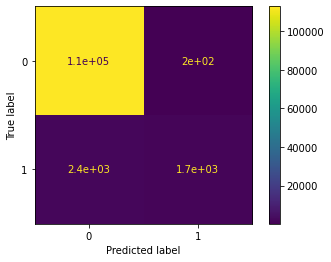

In [183]:
plot_confusion_matrix(model,X_test,y_test)

In [184]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    115254
           1       0.41      0.89      0.56      1880

    accuracy                           0.98    117134
   macro avg       0.71      0.94      0.78    117134
weighted avg       0.99      0.98      0.98    117134

